In [2]:
"""
Set Options
"""

# import libraries
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import pickle as pkl
import seaborn as sns

# configuration options
%matplotlib inline
matplotlib.style.use("seaborn-muted")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
plt.style.use('seaborn')
#sns.set_palette("husl")

In [3]:
"""
import pickle file
"""
with open("./data/filtered_data.pkl", 'rb') as picklefile: 
    filtered = pkl.load(picklefile)

In [4]:
"""
apply aggregation function to get total fluxes per station
"""

# aggregate on station sum over all days
filtered_station = filtered.groupby(['STATION']).agg({'ENTRY_FLUX':['sum'], 'EXIT_FLUX' : ['sum']})
filtered_station.columns = filtered_station.columns.map('_'.join)

# resets index
filtered_station = filtered_station.sort_values(['ENTRY_FLUX_sum'], ascending = False).reset_index()

# renames columns to be consistent
filtered_station.rename(index=str, columns={'ENTRY_FLUX_sum':"ENTRY_SUM"},inplace=True)
filtered_station.rename(index=str, columns={'EXIT_FLUX_sum':"EXIT_SUM"},inplace=True)
filtered_station.head()

,STATION,ENTRY_SUM,EXIT_SUM
0,34 ST-PENN STA,10701055.0,7978101.0
1,34 ST-HERALD SQ,9115976.0,6261677.0
2,GRD CNTRL-42 ST,8930354.0,7929180.0
3,23 ST,8823955.0,6068022.0
4,14 ST-UNION SQ,8497203.0,6969379.0


In [5]:
"""
write to save file
"""

with open('./data/filtered_station.pkl', 'wb') as picklefile:
    pkl.dump(filtered_station, picklefile)

In [6]:
"""
Grouping the dataset based on Station and date to collect the 
total footfals for both entries and exits per station per day
"""

#Grouping the clean station turnstile dataset by station and date, and aggregating the flux data 
filtered_station_date = filtered.groupby(['STATION', 'DATE']).agg({'ENTRY_FLUX':['sum'], 'EXIT_FLUX' : ['sum']}).reset_index()
filtered_station_date.columns = filtered_station_date.columns.map('_'.join)

# Renaming the column names 
filtered_station_date.rename(index=str, columns={'ENTRY_FLUX_sum':"ENTRY_SUM"},inplace=True)
filtered_station_date.rename(index=str, columns={'EXIT_FLUX_sum':"EXIT_SUM"},inplace=True)
filtered_station_date.rename(index=str, columns={'STATION_':"STATION"},inplace=True)
filtered_station_date.rename(index=str, columns={'DATE_':"DATE"},inplace=True)
#filtered_station_date.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM
0,1 AV,2018-02-25,13885.0,14871.0
1,1 AV,2018-02-26,21020.0,22571.0
2,1 AV,2018-02-27,21961.0,23831.0
3,1 AV,2018-02-28,20814.0,20122.0
4,1 AV,2018-03-01,22432.0,24673.0


In [7]:
"""
Using datetime to get the day of the week from the date
"""

filtered_station_date['DAY_OF_WEEK'] = filtered_station_date['DATE'].dt.day_name()
#filtered_station_date.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
0,1 AV,2018-02-25,13885.0,14871.0,Sunday
1,1 AV,2018-02-26,21020.0,22571.0,Monday
2,1 AV,2018-02-27,21961.0,23831.0,Tuesday
3,1 AV,2018-02-28,20814.0,20122.0,Wednesday
4,1 AV,2018-03-01,22432.0,24673.0,Thursday


In [8]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.

one_av=filtered_station_date[filtered_station_date.STATION == '1 AV']
#one_av.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
0,1 AV,2018-02-25,13885.0,14871.0,Sunday
1,1 AV,2018-02-26,21020.0,22571.0,Monday
2,1 AV,2018-02-27,21961.0,23831.0,Tuesday
3,1 AV,2018-02-28,20814.0,20122.0,Wednesday
4,1 AV,2018-03-01,22432.0,24673.0,Thursday


In [9]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
ninety_six=filtered_station_date[filtered_station_date.STATION == '96 ST']
#ninety_six.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
10080,96 ST,2018-02-25,39629.0,25577.0,Sunday
10081,96 ST,2018-02-26,61932.0,39466.0,Monday
10082,96 ST,2018-02-27,57725.0,35413.0,Tuesday
10083,96 ST,2018-02-28,58224.0,36643.0,Wednesday
10084,96 ST,2018-03-01,58382.0,36514.0,Thursday


In [10]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
tt_st=filtered_station_date[filtered_station_date.STATION == '33 ST']
#tt_st.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
4951,33 ST,2018-02-25,10271.0,8664.0,Sunday
4952,33 ST,2018-02-26,24656.0,18373.0,Monday
4953,33 ST,2018-02-27,27670.0,19889.0,Tuesday
4954,33 ST,2018-02-28,27833.0,20051.0,Wednesday
4955,33 ST,2018-03-01,27455.0,19379.0,Thursday


In [11]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
gc=filtered_station_date[filtered_station_date.STATION == 'GRD CNTRL-42 ST']
#gc.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
20608,GRD CNTRL-42 ST,2018-02-25,36848.0,36653.0,Sunday
20609,GRD CNTRL-42 ST,2018-02-26,112825.0,107623.0,Monday
20610,GRD CNTRL-42 ST,2018-02-27,112052.0,107295.0,Tuesday
20611,GRD CNTRL-42 ST,2018-02-28,116732.0,105071.0,Wednesday
20612,GRD CNTRL-42 ST,2018-03-01,104189.0,97018.0,Thursday


In [12]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
one_av=filtered_station_date[filtered_station_date.STATION == '1 AV']
#one_av.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
0,1 AV,2018-02-25,13885.0,14871.0,Sunday
1,1 AV,2018-02-26,21020.0,22571.0,Monday
2,1 AV,2018-02-27,21961.0,23831.0,Tuesday
3,1 AV,2018-02-28,20814.0,20122.0,Wednesday
4,1 AV,2018-03-01,22432.0,24673.0,Thursday


In [13]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
one_o_three=filtered_station_date[filtered_station_date.STATION == '103 ST']
#one_o_three.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
90,103 ST,2018-02-25,9014.0,8198.0,Sunday
91,103 ST,2018-02-26,28992.0,19365.0,Monday
92,103 ST,2018-02-27,30976.0,20379.0,Tuesday
93,103 ST,2018-02-28,31247.0,21155.0,Wednesday
94,103 ST,2018-03-01,31378.0,20819.0,Thursday


In [14]:
#Selecting specific stations from this data for analyzing the footfall traffic for each station. 
#NOTE: these stations have been selected from our list of top station based on INCOME and TRAFFIC.
twenty_three=filtered_station_date[filtered_station_date.STATION == '23 ST']
#twenty_three.head()

,STATION,DATE,ENTRY_SUM,EXIT_SUM,DAY_OF_WEEK
4053,23 ST,2018-02-25,42269.0,32879.0,Sunday
4054,23 ST,2018-02-26,111705.0,79367.0,Monday
4055,23 ST,2018-02-27,122513.0,84973.0,Tuesday
4056,23 ST,2018-02-28,121980.0,83679.0,Wednesday
4057,23 ST,2018-03-01,123645.0,84810.0,Thursday


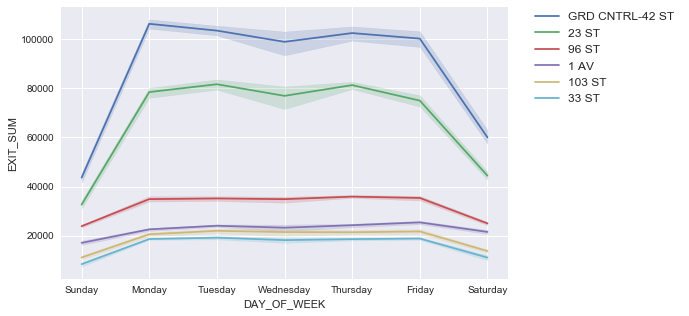

In [19]:
"""
Plotting a figure of the total exits per day of the week, aggregating over 13 weeks of data
and providing the 95% confidence interval as a shadow over the actual line plot
"""

plt.figure(figsize=(8,5))
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = gc, label = 'GRD CNTRL-42 ST ', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = twenty_three, label = '23 ST', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = ninety_six, label = '96 ST', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = one_av, label = '1 AV', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = one_o_three, label = '103 ST ', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='EXIT_SUM', data = tt_st, label = '33 ST', sort =False);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize =12);

# Shows that Wednesdays show the greatest variability in foot traffic. 

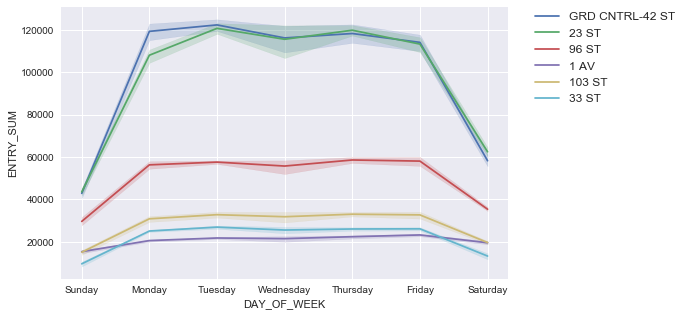

In [20]:
"""
Plotting a figure of the total exits per day of the week, aggregating over 13 weeks of data
and providing the 95% confidence interval as a shadow over the actual line plot
"""

plt.figure(figsize=(8,5))
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = gc, label = 'GRD CNTRL-42 ST ', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = twenty_three, label = '23 ST', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = ninety_six, label = '96 ST', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = one_av, label = '1 AV', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = one_o_three, label = '103 ST ', sort =False);
sns.lineplot(x='DAY_OF_WEEK', y='ENTRY_SUM', data = tt_st, label = '33 ST', sort =False);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize =12);